# Utilities

In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import cv2
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [161]:
def showImage(image):
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')

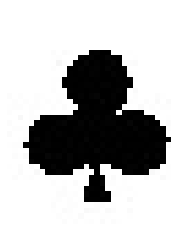

In [162]:

image = cv2.imread("DataSet/trainData/club/2C0.jpg", cv2.IMREAD_COLOR)
showImage(image)

# Import and prepare the trainData

In [163]:
import os
trainData = []
trainLabels = []

dire="DataSet/trainData" 

print(os.listdir(dire))

for innerDir in os.listdir(dire):
    for filename in os.listdir(dire+'/' +innerDir):
        # print(dire+'/' + innerDir +'/' +filename)
        trainData.append(cv2.imread(dire+'/' + innerDir +'/' +filename, cv2.COLOR_BGR2GRAY).flatten())
        trainLabels.append(innerDir)


print("trainData Size:", len(trainData), "and trainLabels size:", len(trainLabels))



['10', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'club', 'diamond', 'heart', 'J', 'K', 'Q', 'spade']
trainData Size: 4015 and trainLabels size: 4015


In [164]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
trainData = scaler.fit_transform(trainData)

# Trainning

In [176]:
model_KNN = KNeighborsClassifier(n_neighbors=17, weights='distance',n_jobs=-1) # TODO: tune hyper parameters
model_KNN.fit(trainData, trainLabels)

model_SVC = svm.SVC(kernel='rbf', probability=True)
model_SVC.fit(trainData, trainLabels)

SVC(probability=True)

# Evaluate the model

In [166]:
from sklearn.metrics import accuracy_score

# KNN
trainLabels_knn_pred = model_KNN.predict(trainData) 
print("KNN Model Accuarcy", accuracy_score(trainLabels, trainLabels_knn_pred)) # validate the model


KNN Model Accuarcy 1.0


In [177]:
from sklearn.metrics import accuracy_score

# SVM
trainLabels_knn_pred = model_SVC.predict(trainData) # test -predict the test trainData-
print("SVC Model Accuarcy", accuracy_score(trainLabels, trainLabels_knn_pred)) # validate the model

SVC Model Accuarcy 0.999252801992528


# Save the model

In [178]:
from joblib import dump, load
dump(model_SVC, 'filename.joblib') 

['filename.joblib']

In [179]:
model = load('model.joblib')

# Random TestCase

In [182]:
import random 
randomIndex = random.randint(0,len(trainLabels))


print("Predicted", trainLabels[randomIndex], "as", model.predict([trainData[randomIndex]]))

print("With confidence", model.predict_proba([trainData[randomIndex]]))


Predicted 8 as ['8']
With confidence [[0.00799916 0.02984578 0.00824556 0.0038384  0.06120437 0.18903531
  0.00491797 0.59868603 0.03199112 0.02351394 0.01084406 0.01919936
  0.00325843 0.00112485 0.00484    0.00083155 0.00062411]]
